In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

In [ ]:
data, info = tfds.load('food101', with_info=True, as_supervised=True, shuffle_files=True, split=['train'])

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

In [18]:
data

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [19]:
def split_data(data, train_size=0.8, test_size=0.1, val_size=0.1):
  size = len(data)
  train = data.take(int(train_size * size))
  rest = data.skip(int(train_size * size))
  test = rest.take(int(test_size * size))
  val = rest.skip(int(test_size * size))

  return train, test, val

In [20]:
train, test, val = split_data(data[0])

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

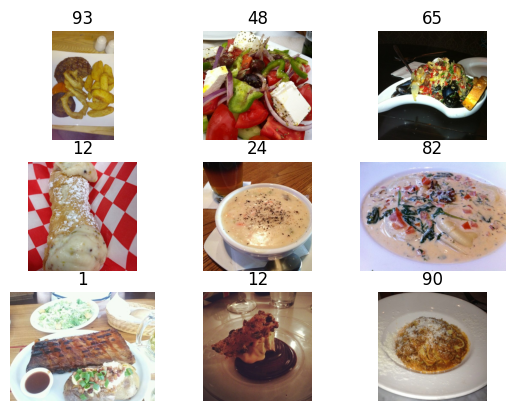

In [22]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(str(label.numpy()))
  plt.imshow(img);


In [23]:
IM_SIZE = 256
def resize_rescale(img, label):
  return tf.image.resize(img, (IM_SIZE, IM_SIZE)) / 255.0, label

In [24]:
train = train.map(resize_rescale)
test = test.map(resize_rescale)
val = val.map(resize_rescale)

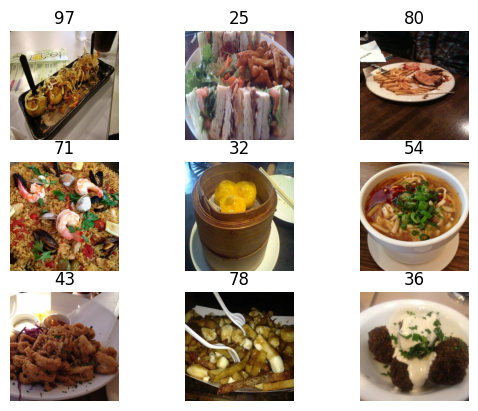

In [25]:
for i, (img, label) in enumerate(train.take(9)):
  ax = plt.subplot(3, 3, i + 1)
  plt.axis('off')
  plt.title(str(label.numpy()))
  plt.imshow(img);

In [26]:
train_dataset = train.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test.shuffle(buffer_size=9, reshuffle_each_iteration=True).batch(1).prefetch(tf.data.AUTOTUNE)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, InputLayer, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

In [28]:
model = Sequential([
    InputLayer(input_shape=(256, 256, 3)),
    Conv2D(filters=16, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Conv2D(filters=32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2), strides=2),

    Flatten(),

    Dense(units=256, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=128, activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    Dense(units=101, activation='softmax'),
])

In [29]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=SparseCategoricalCrossentropy(),
    metrics='accuracy'
)

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 batch_normalization_5 (Bat  (None, 254, 254, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_6 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

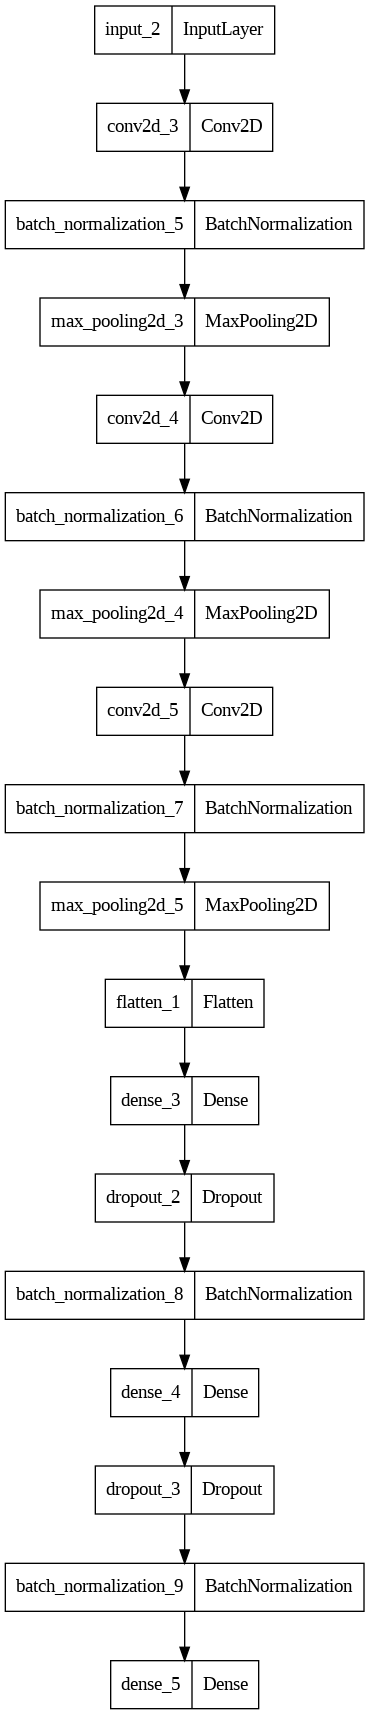

In [31]:
tf.keras.utils.plot_model(model)

In [34]:
hist = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    verbose=2
)

Epoch 1/20
1894/1894 - 222s - loss: 4.2899 - accuracy: 0.0621 - val_loss: 3.8965 - val_accuracy: 0.1154 - 222s/epoch - 117ms/step
Epoch 2/20
1894/1894 - 215s - loss: 3.8120 - accuracy: 0.1217 - val_loss: 3.5853 - val_accuracy: 0.1648 - 215s/epoch - 114ms/step
Epoch 3/20
1894/1894 - 213s - loss: 3.5393 - accuracy: 0.1668 - val_loss: 3.2167 - val_accuracy: 0.2304 - 213s/epoch - 112ms/step
Epoch 4/20
1894/1894 - 215s - loss: 3.2958 - accuracy: 0.2090 - val_loss: 3.0580 - val_accuracy: 0.2619 - 215s/epoch - 114ms/step
Epoch 5/20
1894/1894 - 215s - loss: 3.0125 - accuracy: 0.2613 - val_loss: 3.0699 - val_accuracy: 0.2573 - 215s/epoch - 113ms/step
Epoch 6/20
1894/1894 - 218s - loss: 2.7683 - accuracy: 0.3079 - val_loss: 4.9393 - val_accuracy: 0.1090 - 218s/epoch - 115ms/step
Epoch 7/20
1894/1894 - 215s - loss: 2.4549 - accuracy: 0.3685 - val_loss: 2.5402 - val_accuracy: 0.3603 - 215s/epoch - 113ms/step
Epoch 8/20
1894/1894 - 217s - loss: 2.3035 - accuracy: 0.4092 - val_loss: 3.4065 - val_acc

In [36]:
model.evaluate(test_dataset)

7575/7575 [==============================] - 90s 4ms/step - loss: 0.6884 - accuracy: 0.8185


[0.6883596777915955, 0.8184818625450134]

<img src='https://media.tenor.com/yre5d7bpPDgAAAAM/matt-damon-woohoo.gif'>